<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Просмотр-данных" data-toc-modified-id="Просмотр-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Просмотр данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предподготовка-данных" data-toc-modified-id="Предподготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предподготовка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Устранение-дисбаланса-классов" data-toc-modified-id="Устранение-дисбаланса-классов-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Устранение дисбаланса классов</a></span><ul class="toc-item"><li><span><a href="#Оцениваем-модели-по-метрикам-AUC-ROC,-precision,-recall-и-f1-score" data-toc-modified-id="Оцениваем-модели-по-метрикам-AUC-ROC,-precision,-recall-и-f1-score-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Оцениваем модели по метрикам AUC-ROC, precision, recall и f1-score</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Балансирование,-уменьшение,-увеличение-выборок" data-toc-modified-id="Балансирование,-уменьшение,-увеличение-выборок-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Балансирование, уменьшение, увеличение выборок</a></span></li><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Увеличение выборки</a></span></li><li><span><a href="#Уменьшение-выборки" data-toc-modified-id="Уменьшение-выборки-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Уменьшение выборки</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Просмотр данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier # дерево решений
from sklearn.ensemble import RandomForestClassifier # случайный лес
from sklearn.linear_model import LogisticRegression # логистическая регрессия
from sklearn.model_selection import train_test_split # разделение выборки
import joblib 
from joblib import dump 
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler # масштабирование категориальных переменных
from sklearn.metrics import (f1_score, precision_score, recall_score, accuracy_score, 
                             precision_recall_curve, roc_auc_score, roc_curve, make_scorer,                              
                             mean_squared_error, mean_absolute_error, classification_report)
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV, cross_val_score
import numpy as np
import random

warnings.filterwarnings('ignore') # убираем системные предупреждения

In [3]:
try:
    data = pd.read_csv('Churn.csv')
except:
    data = pd.read_csv('/datasets/Churn.csv') 

In [4]:
def data_info(data):
    print('ОБЩАЯ ИНФОРМАЦИЯ', sep='\n')
    print(data.info()) 
    print('ПРОПУСКИ В ДАННЫХ', '', data.isna().sum(), '', sep='\n')
    print('ПОЛНЫЕ ДУБЛИКАТЫ В ДАННЫХ', '', data.duplicated().sum(), '', sep='\n')
    print('ПЕРВЫЕ 5 ЗАПИСЕЙ', sep='\n')
    display(data.head(5))
    
data_info(data)

ОБЩАЯ ИНФОРМАЦИЯ
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB
None
ПРОПУСКИ В ДАННЫХ

RowNumber            0
CustomerId           0
Surname

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [5]:
data.describe() # описание численных переменных

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
data.describe(include = ['object']) # описание категориальных переменных

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


### Вывод

В целом данные выглядят корректно. Самое главное что у нас нет пропусков в колонке `Exited` (факт ухода клиента), а так же в колонке нет лишних значений, кроме 0 и 1.

Необходимо:

* Заполнить 909 пропусков в столбце `Tenure` (сколько лет человек является клиентом банка);
* Привести название столбцов в змеиный регистр для комфортной работы;
* Исключить фиктивные столбцы `RowNumber`, `customer_id`, `surname` т.к. он дублирует индекс;

<div class="alert alert-block alert-success">
<b>Успех:</b> Ты хорошо владеешь методами первичного изучения данных 👍 Спасибо за информативный вывод
</div>

## Предподготовка данных

In [7]:
# преобразовываем название колонок в змеиный регистр
new_columns = []

for column in data.columns:
    
    column = column[0].lower() + column[1:]
    
    for i in column:
        
        if i.isupper():
            column = column.replace(i, f'_{i.lower()}')
    new_columns.append(column)
    
data.columns = new_columns

In [8]:
# удаляем фиктивные колонки

data = data.drop(columns=['row_number', 'customer_id', 'surname'])

<div class="alert alert-block alert-success">
<b>Успех:</b> Правильно, эти признаки не несут ценной информации
</div>

<AxesSubplot:>

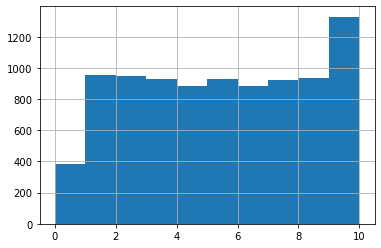

In [9]:
# распределение значений tenure

data['tenure'].hist()

У нас имеются 909 пропусков, это примерно 10% от всех данных. 

Предлагаю 2 вида заполнения пропусков:

1. Заполняем пропуски `0`, т.к. вероятно что при заполнении документов менеджерским составом с новыми клиентами это значение пропускается.

2. Рандомно заполнить пропуски числами таким образом чтобы они не влияли на общую картину.

In [10]:
# возьму в работу второй вариант, т.к. 9% от всех данных могут создать сильный дисбаланс 
# при распределении их в конкретную категорию

percentage_tenure_before = ((data['tenure'].value_counts()  * 100)  / len(data['tenure'])) # процентное распределение всех значений столбаца
percentage_tenure_before

1.0     9.52
2.0     9.50
8.0     9.33
3.0     9.28
5.0     9.27
7.0     9.25
4.0     8.85
9.0     8.82
6.0     8.81
10.0    4.46
0.0     3.82
Name: tenure, dtype: float64

In [11]:
# заполняем пропуски случайными числами от 0 до 10
random.seed(12345) # делаем рандом фиксированным
data.loc[data['tenure'].isna(), 'tenure'] = (data.loc[data['tenure'].isna(), 'tenure'].apply(
                                                 lambda row: float(random.randint(0,10))))

In [12]:
# процентное распределение данных после обработки
percentage_tenure_after = ((data['tenure'].value_counts()  * 100)  / len(data['tenure']))
percentage_tenure_after

2.0     10.49
1.0     10.36
8.0     10.17
5.0     10.16
3.0     10.09
7.0     10.03
6.0      9.69
4.0      9.55
9.0      9.51
10.0     5.26
0.0      4.69
Name: tenure, dtype: float64

In [13]:
percentage_tenure_before - percentage_tenure_after

0.0    -0.87
1.0    -0.84
2.0    -0.99
3.0    -0.81
4.0    -0.70
5.0    -0.89
6.0    -0.88
7.0    -0.78
8.0    -0.84
9.0    -0.69
10.0   -0.80
Name: tenure, dtype: float64

### Вывод

* Заменены названия колонок на змеиный регистр;
* Удалены фиктивные колонки не влияющие на обучение;
* Распределены 9% пропусков в колонке `tenure` примерно равномерно, итоговый прирост каждого значения составил от 1% до 0.69%;


## Исследование задачи

**План**

1. Кодируем категориальные колонки
2. Масштабируем численные данные
3. Обучаем модели

**Кодируем категориальные колонки**

In [14]:
# Применение техники OHE (one hot encoding)
data = pd.get_dummies(data, drop_first=True) # 

In [15]:
# проверяем корректность срабатывания кодирования категориальных колонок
data.head(5)

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


<div class="alert alert-block alert-success">
<b>Успех:</b> В данном случае это наиболее подходящий способ закодировать категориальные колонки
</div>

In [16]:
# выделяем признаки  и целевые признаки
features = data.drop(columns=['exited'])
target = data['exited']

In [17]:
# разбиваем выборки на тренировочные, тестовые и валидационные
features_train, features_test, target_train, target_test = train_test_split(features, target, 
                                                                            test_size=0.6, random_state=12345 )

features_test, features_valid, target_test, target_valid = train_test_split(features_test, target_test, 
                                                                            test_size=0.5, random_state=12345 )

In [18]:
print('Размерность тренировочной выборки:', features_train.shape)
print('Размерность тренировочного целового признака:', target_train.shape)
print('Размерность тестовой выборки:', features_test.shape)
print('Размерность тестового целового признака:', target_test.shape)
print('Размерность валидационной выборки:', features_valid.shape)
print('Размерность валидационного целового признака:', target_valid.shape)

Размерность тренировочной выборки: (4000, 11)
Размерность тренировочного целового признака: (4000,)
Размерность тестовой выборки: (3000, 11)
Размерность тестового целового признака: (3000,)
Размерность валидационной выборки: (3000, 11)
Размерность валидационного целового признака: (3000,)


<div class="alert alert-block alert-success">
<b>Успех:</b> Данные поделены в адекватных пропорциях. Молодец, что смотришь на размеры выборок после разбиения
</div>

**Масштабируем численные данные**

In [19]:
# выделим все не бинарные колонки

non_bi_col =[]

for column in features.columns:
    if len(features[column].unique()) > 2:
        non_bi_col.append(column)
        
print(non_bi_col)

['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary']


In [20]:
# масштабируем данные методом StandardScaler
scaler = StandardScaler() # назначаем модель
scaler.fit(features_train[non_bi_col]) # обучаем "преобразователь"

# преобразуйте тестовую выборку
features_train[non_bi_col] = scaler.transform(features_train[non_bi_col]) 
# преобразуйте тестовую выборку
features_test[non_bi_col] = scaler.transform(features_test[non_bi_col])
# преобразуйте валидационную выборку
features_valid[non_bi_col] = scaler.transform(features_valid[non_bi_col])


In [21]:
# проверка
features_train.head(5)

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
5201,-0.870811,-0.287002,-1.384989,-0.169720,-0.878050,1,0,0.964802,0,0,1
5502,-0.400980,0.087644,0.337527,0.578230,-0.878050,1,1,-0.373307,0,1,0
1715,0.340309,0.368628,1.371037,0.501286,0.836054,0,1,1.660614,1,0,1
1951,-0.505387,1.305242,1.026534,1.081143,-0.878050,1,0,1.594400,0,0,1
6415,0.225462,0.274966,1.371037,-1.254401,0.836054,1,0,-1.650749,0,0,0


**Обучим модели при дисбалансе классов**

In [22]:
# проверяем процентное соотношение классов
target.value_counts() / len(target) * 100

0    79.63
1    20.37
Name: exited, dtype: float64

**Дерево решений**

In [23]:
%%time
best_model_tree = None
best_tree_f1_score = 0

for depth in range(1, 20):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train)
    predicted_valid_tree = model.predict(features_valid)
    f1_result = f1_score(target_valid, predicted_valid_tree)
    if f1_result > best_tree_f1_score:
        best_tree_f1_score = f1_result
        best_model_tree = model
        best_tree_depth = depth

print('Наилучший показатель f1 меры для дерева решений:', best_tree_f1_score)
print('Глубина наилучшей модели', best_tree_depth)        
    


Наилучший показатель f1 меры для дерева решений: 0.5703125
Глубина наилучшей модели 7
Wall time: 314 ms


**Случайный лес**

In [24]:
%%time
best_model_forest = None
best_forest_f1_score = 0


for depth in range(1, 20):
    for est in range (1, 100):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_train, target_train)
        predicted_valid_forest = model.predict(features_valid)
        f1_result = f1_score(target_valid, predicted_valid_forest)
        
        if f1_result > best_forest_f1_score:
            best_model_forest = model
            best_forest_f1_score = f1_result
            best_forest_depth = depth
            best_forest_est = est

print('Наилучший показатель f1 меры для случайного леса:', best_forest_f1_score)
print('Глубина наилучшей модели', best_forest_depth)
print('Количество листьев наилучшей модели', best_forest_depth)

Наилучший показатель f1 меры для случайного леса: 0.5898989898989899
Глубина наилучшей модели 15
Количество листьев наилучшей модели 15
Wall time: 6min 31s


**Логистическая регрессия**

In [25]:
%%time

model_regression = LogisticRegression(random_state=12345, solver = 'liblinear')
model_regression.fit(features_train, target_train)
predicted_valid_log = model_regression.predict(features_valid)
f1_regression_score = f1_score(target_valid, predicted_valid_log)
print('Наилучший показатель f1 меры для логистической регрессии:', f1_regression_score)

Наилучший показатель f1 меры для логистической регрессии: 0.3485380116959064
Wall time: 19.6 ms


### Вывод



В ходе исследовательской деятельности категориальные данные были кодированы методом OHE, а количемтвенные данные масштабированы.

После определение обучающей, валидационной и тестовой выборок были проведены исследования т аот их результаты:

* Наилучший показатель f1 меры для `дерева решений`: `0.5703125`;
* Наилучший показатель f1 меры для `случайного леса`: `0.5898989`;
* Наилучший показатель f1 меры для `логистической регрессии`: `0.3485380`;

Ни одна из моделей не дотягивает до показателя f1 в 0.59, причин этому может быть множество, но сейчас мы проработаем над балансом классов.

<div class="alert alert-block alert-success">
<b>Успех:</b> Почти удалось добиться необходимого результата уже в начале) Модели обучены корректно
</div>

## Устранение дисбаланса классов

Прежде чем работать с дисбалансом нужно определить метрику с которой мы будем работать

### Оцениваем модели по метрикам AUC-ROC, precision, recall и f1-score

In [26]:
def quality_model(model, prediction): #проверка качества моделей
    probabilities = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities[:, 1]

    fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)


    plt.figure()
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-кривая')
    plt.show()
    
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    mse = mean_squared_error(target_valid, prediction) 
    print('Рассматриваемая модель: ', model)
    print('Значение метрики AUC-ROC для модели: ', auc_roc)
    print('classification_report на валидационной выборке: \n', classification_report(target_valid, prediction))

**Дерево решений**

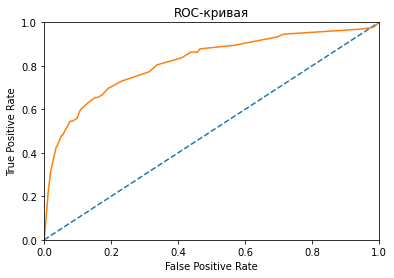

Рассматриваемая модель:  DecisionTreeClassifier(max_depth=7, random_state=12345)
Значение метрики AUC-ROC для модели:  0.8165785573105523
classification_report на валидационной выборке: 
               precision    recall  f1-score   support

           0       0.88      0.86      0.87      2393
           1       0.50      0.54      0.52       607

    accuracy                           0.80      3000
   macro avg       0.69      0.70      0.70      3000
weighted avg       0.80      0.80      0.80      3000



In [27]:
quality_model(best_model_tree, predicted_valid_tree)

**Случайный лес**

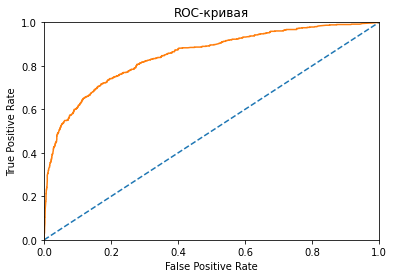

Рассматриваемая модель:  RandomForestClassifier(max_depth=15, n_estimators=42, random_state=12345)
Значение метрики AUC-ROC для модели:  0.8477199767856688
classification_report на валидационной выборке: 
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      2393
           1       0.75      0.46      0.57       607

    accuracy                           0.86      3000
   macro avg       0.81      0.71      0.74      3000
weighted avg       0.85      0.86      0.85      3000



In [28]:
quality_model(best_model_forest, predicted_valid_forest)

**Логистическая регрессия**

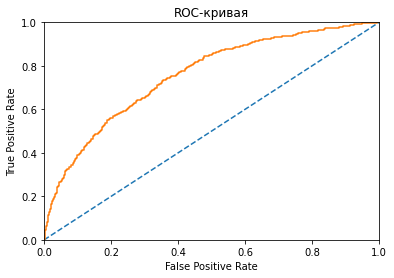

Рассматриваемая модель:  LogisticRegression(random_state=12345, solver='liblinear')
Значение метрики AUC-ROC для модели:  0.7559128732829347
classification_report на валидационной выборке: 
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      2393
           1       0.60      0.25      0.35       607

    accuracy                           0.81      3000
   macro avg       0.72      0.60      0.62      3000
weighted avg       0.79      0.81      0.78      3000



In [29]:
quality_model(model_regression, predicted_valid_log)

**Проверим дисбаланс классов**

In [30]:
data['exited'].value_counts(normalize=True) * 100

0    79.63
1    20.37
Name: exited, dtype: float64

### Вывод

*Соотношение 0 к 1 - 80% и 20% соответственно, это говорит о сильном дисбалансе, даже если мы будем указывать во всех ответах 0 то получим высокую точность в 80%. Нужно сбалансировать классы*

* Значение метрики AUC-ROC для модели `дерева решений`: `0.816578`;

* Значение метрики AUC-ROC для модели `случайного леса`: `0.8477199`;

* Значение метрики AUC-ROC для модели `логистической регрессии`: `0.755912`;


### Балансирование, уменьшение, увеличение выборок

**Балансирование**

**Дерево решений**

In [31]:
%%time
best_model_tree_balanced = None
best_tree_f1_score_balanced = 0

for depth in range(1, 100):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight='balanced') # применяем балансировку классов
    model.fit(features_train, target_train)
    predicted_valid_tree_balanced = model.predict(features_valid)
    f1_result = f1_score(target_valid, predicted_valid_tree_balanced)
    if f1_result > best_tree_f1_score_balanced:
        best_tree_f1_score_balanced = f1_result
        best_model_tree_balanced = model
        best_tree_depth = depth

print('Наилучший показатель f1 меры для сбалансированного дерева решений:', best_tree_f1_score_balanced)
print('Глубина наилучшей модели', best_tree_depth)

Наилучший показатель f1 меры для сбалансированного дерева решений: 0.5678524374176549
Глубина наилучшей модели 5
Wall time: 2.15 s


**Случайный лес**

In [32]:
%%time
best_model_forest_balanced = None
best_forest_f1_score_balanced = 0


for depth in range(1, 20):
    for est in range (1, 100,2):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth, class_weight='balanced') # применяем балансировку классов
        model.fit(features_train, target_train)
        predicted_valid_forest_balanced = model.predict(features_valid)
        f1_result = f1_score(target_valid, predicted_valid_forest_balanced)
        
        if f1_result > best_forest_f1_score_balanced:
            best_model_forest_balanced = model
            best_forest_f1_score_balanced = f1_result
            best_forest_depth = depth
            best_forest_est = est

print('Наилучший показатель f1 меры для сбалансированного случайного леса:', best_forest_f1_score_balanced)
print('Глубина наилучшей модели', best_forest_depth)
print('Количество листьев наилучшей модели', best_forest_depth)

Наилучший показатель f1 меры для сбалансированного случайного леса: 0.6224961479198767
Глубина наилучшей модели 8
Количество листьев наилучшей модели 8
Wall time: 3min 24s


**Логистическая регрессия**

In [33]:
%%time

model_regression_balanced = LogisticRegression(random_state=12345, solver = 'liblinear', class_weight='balanced')  # применяем балансировку классов
model_regression_balanced.fit(features_train, target_train)
predicted_valid_log_balanced = model_regression_balanced.predict(features_valid)
f1_regression_score_balanced = f1_score(target_valid, predicted_valid_log_balanced)
print('Наилучший показатель f1 меры для сбалансированной логистической регрессии:', f1_regression_score_balanced)

Наилучший показатель f1 меры для сбалансированной логистической регрессии: 0.47518972562755396
Wall time: 15 ms


### Увеличение выборки

In [34]:
def upsample(features, target, repeat):
    
    '''
    Функция позмоляет увеличить количество 
    повторений одного из значений
    в данном случае значения 0
    '''
    features_zeros = features[target_train == 0]
    features_ones = features[target_train == 1]
    target_zeros = target[target_train == 0]
    target_ones = target[target_train == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [35]:
# увеличели выборку
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

In [36]:
# проверка 
print(target_upsampled.value_counts())

1    3376
0    3156
Name: exited, dtype: int64


*Код сработал верно, количество 0 и 1 примерно сбалансировано*

<div class="alert alert-block alert-success">
<b>Успех:</b> Функция увеличения выборки написана правильно 💪 Параметр repeat выбран так, чтобы классы сбалансировались
</div>

**Дерево решений**

In [37]:
%%time
best_model_tree_upsampled = None
best_tree_f1_score_upsampled = 0

for depth in range(1, 100):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_upsampled, target_upsampled) # применили upsampled выборки
    predicted_valid_tree_upsampled = model.predict(features_valid)
    f1_result = f1_score(target_valid, predicted_valid_tree_upsampled)
    if f1_result > best_tree_f1_score_upsampled:
        best_tree_f1_score_upsampled = f1_result
        best_model_tree_upsampled = model
        best_tree_depth = depth

print('Наилучший показатель f1 меры для дерева решений с увеличенной выборкой:', best_tree_f1_score_upsampled)
print('Глубина наилучшей модели', best_tree_depth)

Наилучший показатель f1 меры для дерева решений с увеличенной выборкой: 0.5678524374176549
Глубина наилучшей модели 5
Wall time: 2.66 s


**Случайный лес**

In [38]:
%%time
best_model_forest_upsampled = None
best_forest_f1_score_upsampled = 0


for depth in range(1, 20):
    for est in range (1, 100,2):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_upsampled, target_upsampled) # применили upsampled выборки
        predicted_valid_forest_upsampled = model.predict(features_valid)
        f1_result = f1_score(target_valid, predicted_valid_forest_upsampled)
        
        if f1_result > best_forest_f1_score_upsampled:
            best_model_forest_upsampled = model
            best_forest_f1_score_upsampled = f1_result
            best_forest_depth = depth
            best_forest_est = est

print('Наилучший показатель f1 меры для случайного леса с увеличенной выборкой:', best_forest_f1_score_upsampled)
print('Глубина наилучшей модели', best_forest_depth)
print('Количество листьев наилучшей модели', best_forest_depth)

Наилучший показатель f1 меры для случайного леса с увеличенной выборкой: 0.624390243902439
Глубина наилучшей модели 12
Количество листьев наилучшей модели 12
Wall time: 4min 32s


**Логистическая регрессия**

In [39]:
%%time

model_regression = LogisticRegression(random_state=12345, solver = 'liblinear')
model_regression.fit(features_upsampled, target_upsampled) # применили upsampled выборки
predicted_valid_log_upsampled = model_regression.predict(features_valid)
f1_regression_score_upsampled = f1_score(target_valid, predicted_valid_log_upsampled)
print('Наилучший показатель f1 меры для логистической регрессии с увеличенной выборкой:', f1_regression_score_upsampled)

Наилучший показатель f1 меры для логистической регрессии с увеличенной выборкой: 0.47164514317798995
Wall time: 18 ms


### Уменьшение выборки

In [40]:
def downsample(features, target, fraction):
    features_zeros = features[target_train == 0]
    features_ones = features[target_train == 1]
    target_zeros = target[target_train == 0]
    target_ones = target[target_train == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

In [41]:
# уменьшили выборку
features_downsample, target_downsample = downsample(features_train, target_train, .3)

In [42]:
# проверка 
target_downsample.value_counts()

0    947
1    844
Name: exited, dtype: int64

**Дерево решений**

In [43]:
%%time
best_model_tree_downsample = None
best_tree_f1_score_downsample = 0

for depth in range(1, 100):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_downsample, target_downsample) # применили downsample выборки
    predicted_valid_tree_downsample = model.predict(features_valid)
    f1_result = f1_score(target_valid, predicted_valid_tree_downsample)
    if f1_result > best_tree_f1_score_downsample:
        best_tree_f1_score_downsample = f1_result
        best_model_tree_downsample = model
        best_tree_depth = depth

print('Наилучший показатель f1 меры для дерева решений с уменьшеной выборкой:', best_tree_f1_score_downsample)
print('Глубина наилучшей модели', best_tree_depth)        
    


Наилучший показатель f1 меры для дерева решений с уменьшеной выборкой: 0.5780590717299577
Глубина наилучшей модели 6
Wall time: 1.17 s


**Случайный лес**

In [44]:
%%time
best_model_forest_downsample = None
best_forest_f1_score_downsample = 0


for depth in range(1, 20):
    for est in range (1, 100,2):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_downsample, target_downsample) # применили downsample выборки
        predicted_valid_forest_downsample = model.predict(features_valid)
        f1_result = f1_score(target_valid, predicted_valid_forest_downsample)
        
        if f1_result > best_forest_f1_score_downsample:
            best_model_forest_downsample = model
            best_forest_f1_score_downsample = f1_result
            best_forest_depth = depth
            best_forest_est = est

print('Наилучший показатель f1 меры для случайного леса с уменьшеной выборкой:', best_forest_f1_score_downsample)
print('Глубина наилучшей модели', best_forest_depth)
print('Количество листьев наилучшей модели', best_forest_depth)

Наилучший показатель f1 меры для случайного леса с уменьшеной выборкой: 0.6128813559322034
Глубина наилучшей модели 9
Количество листьев наилучшей модели 9
Wall time: 2min 39s


**Логистическая регрессия**

In [45]:
%%time

model_regression = LogisticRegression(random_state=12345, solver = 'liblinear')
model_regression.fit(features_downsample, target_downsample) # применили downsample выборки
predicted_valid_log_downsample = model_regression.predict(features_valid)
f1_regression_score_downsample = f1_score(target_valid, predicted_valid_log_downsample)
print('Наилучший показатель f1 меры для логистической регрессии с уменьшеной выборкой:', f1_regression_score_downsample)

Наилучший показатель f1 меры для логистической регрессии с уменьшеной выборкой: 0.47332077840552417
Wall time: 11 ms


### Вывод

В данном разделе в целях повышения качества исследуемых моделей были проведены процедуры балансировки, увеличения и уменьшения  выборок.

По итогам проделанной работы можно сделать вывод, что больший прирост показателей эффективности даёт увеличение выборки.

Исходя из всего вышесказанного, можно сделать вывод, что наилучшие показатели даёт модель `cлучайного леса` с гиперпараметрами: max_depth=12, n_estimators=12 обученная на `увеличнной выборке`.

## Тестирование модели

*Возьмём лучших представителей 3-х моделей* (на деле нужно взять самую точную, но мне просто интересно)

**Дерево решений**

In [46]:
predict_test_tree = best_model_tree_downsample.predict(features_test)
f1_final_score_tree = f1_score(target_test, predict_test_tree)

print('Наилучший показатель f1 меры для дерева решений с уменьшеной выборкой:', f1_final_score_tree)

Наилучший показатель f1 меры для дерева решений с уменьшеной выборкой: 0.5702306079664571


**Случайный лес**

In [47]:
predict_test_forest = best_model_forest_upsampled.predict(features_test)
f1_final_score_forest = f1_score(target_test, predict_test_forest)

print('Наилучший показатель f1 меры для случайного леса с увеличенной выборкой:', f1_final_score_forest)

Наилучший показатель f1 меры для случайного леса с увеличенной выборкой: 0.6031746031746033


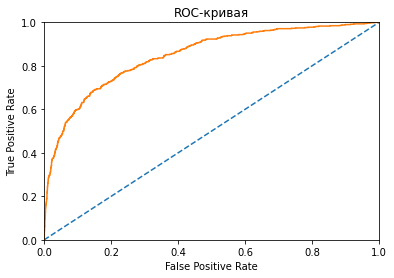

Рассматриваемая модель:  RandomForestClassifier(max_depth=12, n_estimators=67, random_state=12345)
Значение метрики AUC-ROC для модели:  0.8484024504384267
MAE на валидационной выборке:  0.16666666666666666
classification_report на валидационной выборке: 
               precision    recall  f1-score   support

           0       0.91      0.88      0.89      2414
           1       0.56      0.65      0.60       586

    accuracy                           0.83      3000
   macro avg       0.74      0.76      0.75      3000
weighted avg       0.84      0.83      0.84      3000



In [48]:
#quality_model(best_model_forest_upsampled, best_model_forest_upsampled.predict(features_test))

probabilities = best_model_forest_upsampled.predict_proba(features_test)
probabilities_one_test = probabilities[:, 1]

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)


plt.figure()
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()
    
auc_roc = roc_auc_score(target_test, probabilities_one_test)
mse = mean_squared_error(target_test, predict_test_forest) 
print('Рассматриваемая модель: ', best_model_forest_upsampled)
print('Значение метрики AUC-ROC для модели: ', auc_roc)
print('MAE на валидационной выборке: ', mean_absolute_error(target_test, predict_test_forest))
print('classification_report на валидационной выборке: \n', classification_report(target_test, predict_test_forest))

**логистическая регрессия**

In [49]:
predict_test_log = model_regression_balanced.predict(features_test)
f1_final_score_log = f1_score(target_test, predict_test_log)

print('Наилучший показатель f1 меры для логистической регрессии с балансом классов:', f1_final_score_log)

Наилучший показатель f1 меры для логистической регрессии с балансом классов: 0.48042080654587954


## Общий вывод

Целью данного исследования было составление модели которая бы предсказывала отток клиентов из "Бета-банка". Для метрики качества бизнес определил что значение f1-меры должно быть больше 0.59

Для достижения поставленной цели имеющийся датасет был изучен, предобработан, а данные были разделены на три выборки: обучающую тестовую и валидационную.

Затем были построены три модели: дерево решений, случайный лес и логистическая регрессия.

После проведения исследовательской дейтельности и балансировки классов и выборок получилось достичь значения на валидационных выборках `0.62` что соответствует условию бизнеса

По итогу, модель с наилучшими характеристиками - это:
RandomForestClassifier(max_depth=12, n_estimators=12), которая показала следующие результаты:
* f1-мера - `0.6031746031746033`
* AUC-ROC - `0.8484024504384267`